In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
avisos = pd.read_csv('Predecir/avisos_detalles_train.csv')
postulantes = pd.read_csv('Predecir/postulantes_datos_train.csv')
postulaciones = pd.read_csv('Predecir/df_postulaciones.csv')

In [3]:
del avisos['Unnamed: 0']
del postulantes['Unnamed: 0']
del postulaciones['Unnamed: 0']

In [2]:
avisos = pd.read_csv('Predecir/avisos_detalles_predict.csv')
postulantes = pd.read_csv('Predecir/postulantes_datos_predict.csv')
postulaciones = pd.read_csv('Predecir/df_postulaciones.csv')

In [12]:
postulantes.isnull().sum()

idpostulante                               0
nombre                                 41751
estado                                 41751
sexo                                       0
edad                                   19671
vistas_postulante                      18785
cant_dias_actividad                    18785
postu_postulante                       59263
tipo_de_trabajo_popular                61394
nivel_laboral_popular                  61394
nombre_area_popular                    61394
denominacion_empresa_popular           61394
tipo_de_trabajo_popular_postu          61394
nivel_laboral_popular_postu            61394
nombre_area_popular_postu              61394
denominacion_empresa_popular_postu     61394
tipo_de_trabajo_popular_vistas         19952
nivel_laboral_popular_vistas           19952
nombre_area_popular_vistas             19952
denominacion_empresa_popular_vistas    19952
dtype: int64

In [4]:
use = ['idpostulante', 'nombre', 'estado', 'sexo', 'edad', 'vistas_postulante',\
      'cant_dias_actividad', 'tipo_de_trabajo_popular_vistas', 'nivel_laboral_popular_vistas',\
      'nombre_area_popular_vistas', 'denominacion_empresa_popular_vistas']
postulantes = postulantes.loc[:, use]

In [10]:
postulantes.isnull().sum()

idpostulante                               0
nombre                                 41751
estado                                 41751
sexo                                       0
edad                                   19671
vistas_postulante                      18785
cant_dias_actividad                    18785
tipo_de_trabajo_popular_vistas         19952
nivel_laboral_popular_vistas           19952
nombre_area_popular_vistas             19952
denominacion_empresa_popular_vistas    19952
dtype: int64

In [9]:
avisos.isnull().sum()

idaviso                     0
tipo_de_trabajo             0
nivel_laboral               0
nombre_area                 0
denominacion_empresa        0
web                         0
crecimiento                 0
capacitacion                0
clima laboral               0
multinacional               0
incorp_inmediata            0
disponibilidad_horaria      0
disponibilidad_viajar       0
flexibilidad                0
secundario                  0
terciario                   0
ingles                      0
estudiantes                 0
conoc_informatica           0
experiencia                 0
proactivo                   0
relaciones_pers             0
desarrollador               0
cajero                      0
vendedor                    0
ingeniero                   0
analista                    0
administrativo              0
junior                      0
jefe                        0
marketing                   0
supervisor                  0
total_vistas               78
cant_dias 

In [7]:
del avisos['postu_total']
del avisos['vistas_median']
del avisos['edad_popular_postu']
del avisos['nombre_popular_postu']
del avisos['online']



#del avisos['total_vistas']

In [8]:
avisos.isnull().sum()

idaviso                     0
tipo_de_trabajo             0
nivel_laboral               0
nombre_area                 0
denominacion_empresa        0
web                         0
crecimiento                 0
capacitacion                0
clima laboral               0
multinacional               0
incorp_inmediata            0
disponibilidad_horaria      0
disponibilidad_viajar       0
flexibilidad                0
secundario                  0
terciario                   0
ingles                      0
estudiantes                 0
conoc_informatica           0
experiencia                 0
proactivo                   0
relaciones_pers             0
desarrollador               0
cajero                      0
vendedor                    0
ingeniero                   0
analista                    0
administrativo              0
junior                      0
jefe                        0
marketing                   0
supervisor                  0
total_vistas               78
cant_dias 

In [9]:
avisos.head()

,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,web,crecimiento,capacitacion,clima laboral,multinacional,...,analista,administrativo,junior,jefe,marketing,supervisor,total_vistas,cant_dias,edad_popular_vistas,nombre_popular_vistas
0,8725750,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,137.0,26.0,26.0,3.0
1,17903700,1,1,2,2,0,0,0,0,0,...,0,0,0,0,0,0,1935.0,51.0,36.0,3.0
2,1000150677,1,1,3,3,0,0,0,0,0,...,0,0,0,0,0,0,2.0,3.0,38.0,1.0
3,1000610287,1,1,3,4,0,1,1,0,1,...,0,0,0,0,0,0,394.0,83.0,50.0,1.0
4,1000872556,1,1,4,5,0,0,0,0,0,...,0,0,0,0,0,1,1.0,0.0,25.0,1.0


In [7]:
postulantes.head()

,idpostulante,nombre,estado,sexo,edad,vistas_postulante,cant_dias_actividad,tipo_de_trabajo_popular_vistas,nivel_laboral_popular_vistas,nombre_area_popular_vistas,denominacion_empresa_popular_vistas
0,NdJl,4.0,1.0,2,49.0,60.0,88.0,1.0,3.0,10.0,140.0
1,1d2B,3.0,1.0,2,42.0,4.0,7.0,1.0,1.0,5.0,38.0
2,NPBx,5.0,1.0,2,37.0,34.0,81.0,1.0,1.0,10.0,410.0
3,ZKl5,5.0,1.0,2,44.0,41.0,89.0,1.0,5.0,1.0,173.0
4,Y043Z,3.0,1.0,2,39.0,12.0,50.0,1.0,1.0,25.0,269.0


In [18]:
postulantes.shape

(408146, 11)

In [10]:
postulantes_train = postulantes.loc[(postulantes['edad']>18.0)&(postulantes['edad']<60.0), :]

In [11]:
postulantes_train = postulantes_train.loc[(postulantes_train['vistas_postulante']>0.0)]

In [12]:
postulantes_train = postulantes_train.loc[(postulantes_train['cant_dias_actividad']>0.0)]

In [13]:
postulantes_train.shape

(273870, 11)

In [11]:
postulantes_train = postulantes.copy()

In [12]:
postulantes_train = postulantes_train.dropna()

In [13]:
postulantes_train.shape

(344793, 11)

In [14]:
avisos_train = avisos.copy()

In [15]:
avisos_train.shape

(19696, 36)

In [16]:
avisos_train = avisos_train.dropna()

In [17]:
avisos_train.shape

(19562, 36)

In [25]:
avisos_train.columns

Index(['idaviso', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa', 'web', 'crecimiento', 'capacitacion',
       'clima laboral', 'multinacional', 'incorp_inmediata',
       'disponibilidad_horaria', 'disponibilidad_viajar', 'flexibilidad',
       'secundario', 'terciario', 'ingles', 'estudiantes', 'conoc_informatica',
       'experiencia', 'proactivo', 'relaciones_pers', 'desarrollador',
       'cajero', 'vendedor', 'ingeniero', 'analista', 'administrativo',
       'junior', 'jefe', 'marketing', 'supervisor', 'online', 'total_vistas',
       'cant_dias', 'edad_popular_vistas', 'nombre_popular_vistas'],
      dtype='object')

In [26]:
avisos_train['total_vistas'].mean()

548.588794601779

In [27]:
avisos_train['total_vistas'].median()

200.0

In [28]:
avisos_train['cant_dias'].mean()

28.789949902872916

In [29]:
avisos_train = avisos_train.loc[(avisos_train['cant_dias'] < 35), :]

In [30]:
avisos_train = avisos_train.loc[(avisos_train['cant_dias'] > 0)&(avisos_train['total_vistas'] <= 1500.0)\
                               &(avisos_train['total_vistas']>100.0), :]

In [29]:
avisos_train = avisos_train.loc[(avisos_train['total_vistas'] <= 10000.0)\
                               &(avisos_train['total_vistas']>10.0), :]

In [31]:
avisos_train.shape

(7404, 37)

In [18]:
avisos_si = avisos_train.copy()
avisos_si['se_postulo'] = 1

In [19]:
postulaciones.shape

(6604534, 2)

Muy grande para procesar, procesamos por bloques random y calculamos un promedio general

In [20]:
postulaciones = postulaciones.sample(frac=0.25)

In [21]:
postulaciones.shape

(1651134, 2)

In [22]:
postulaciones = pd.merge(postulaciones, avisos_si, how='inner', on=['idaviso'])

In [23]:
postulaciones.shape

(1546222, 38)

In [24]:
postulaciones = pd.merge(postulaciones, postulantes_train, how='inner', on=['idpostulante'])

In [25]:
postulaciones.shape

(1480308, 48)

In [21]:
postulaciones.head()

,idaviso,idpostulante,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,web,crecimiento,capacitacion,clima laboral,...,se_postulo,nombre,estado,sexo,edad,cant_dias_actividad,tipo_de_trabajo_popular_vistas,nivel_laboral_popular_vistas,nombre_area_popular_vistas,denominacion_empresa_popular_vistas
0,1112382140,mzd9VlZ,1,1,85,686,0,0,1,0,...,1,5.0,2.0,1,36.0,56.0,1.0,1.0,10.0,39.0
1,1112377586,mzd9VlZ,1,3,10,27,0,0,0,0,...,1,5.0,2.0,1,36.0,56.0,1.0,1.0,10.0,39.0
2,1112353728,mzd9VlZ,1,3,10,918,0,0,0,0,...,1,5.0,2.0,1,36.0,56.0,1.0,1.0,10.0,39.0
3,1112430020,mzd9VlZ,1,1,36,1421,0,1,0,1,...,1,5.0,2.0,1,36.0,56.0,1.0,1.0,10.0,39.0
4,1112363663,mzd9VlZ,1,1,87,1413,0,0,0,1,...,1,5.0,2.0,1,36.0,56.0,1.0,1.0,10.0,39.0


Contamos cuantos postulados = 1 tenemos para ver cuantos 0 ponemos

In [26]:
postulaciones.shape

(1480308, 48)

Probamos un 50% aprox de ceros en relacion a los unos

In [27]:
len(postulaciones[postulaciones["se_postulo"]==1])

1480308

In [28]:
def random_fill(row):
    return np.random.choice(avisos_train['idaviso'])

In [29]:
while (len(postulaciones[postulaciones["se_postulo"]==1])*1.0 > len(postulaciones[postulaciones["se_postulo"]==0])):
    relleno = postulantes_train.sample(frac=0.5).copy()
    #relleno['idaviso'] = np.nan
    relleno['idaviso'] = relleno.apply(random_fill, axis=1)
    relleno = pd.merge(relleno, avisos_train, how='inner', on=['idaviso'])
    postulaciones = pd.merge(postulaciones, relleno, how='outer')
    postulaciones = postulaciones.fillna({'se_postulo' : 0})
    print(len(postulaciones[postulaciones["se_postulo"]==0]))

172356
344717
517070
689406
861748
1034094
1206425
1378750
1551083


In [30]:
postulaciones.shape

(3031391, 48)

In [31]:
se_postulo = postulaciones['se_postulo']
del postulaciones['se_postulo']
del postulaciones['idaviso']
del postulaciones['idpostulante']

# DecisionTree

In [32]:
decisiontree = DecisionTreeClassifier(random_state=103040)
decisiontree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 103040,
 'splitter': 'best'}

In [33]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [34]:
param_grid= {'max_features': ["auto"], 'criterion': ['gini', 'entropy']}
grid_drop = GridSearchCV(decisiontree, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'criterion': 'entropy', 'max_features': 'auto'} 0.792792605139


In [35]:
grid_drop.best_estimator_.feature_importances_  

array([ 0.00524243,  0.0113715 ,  0.04092669,  0.03580457,  0.00222311,
        0.00399848,  0.00466774,  0.00386581,  0.00387363,  0.00301753,
        0.00503511,  0.00284205,  0.00247738,  0.0049316 ,  0.00167591,
        0.00434046,  0.00572761,  0.00669028,  0.00529259,  0.0052006 ,
        0.0046572 ,  0.00651707,  0.00479118,  0.00375625,  0.00413721,
        0.00424936,  0.00293677,  0.00203616,  0.0018588 ,  0.00716482,
        0.00319279,  0.15140015,  0.06242959,  0.03321218,  0.00984463,
        0.02605539,  0.01435457,  0.01553956,  0.05062956,  0.17064902,
        0.13015326,  0.00587357,  0.00999022,  0.06076028,  0.05460531])

In [36]:
postulaciones.columns

Index(['tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa', 'web', 'crecimiento', 'capacitacion',
       'clima laboral', 'multinacional', 'incorp_inmediata',
       'disponibilidad_horaria', 'disponibilidad_viajar', 'flexibilidad',
       'secundario', 'terciario', 'ingles', 'estudiantes', 'conoc_informatica',
       'experiencia', 'proactivo', 'relaciones_pers', 'desarrollador',
       'cajero', 'vendedor', 'ingeniero', 'analista', 'administrativo',
       'junior', 'jefe', 'marketing', 'supervisor', 'total_vistas',
       'cant_dias', 'edad_popular_vistas', 'nombre_popular_vistas', 'nombre',
       'estado', 'sexo', 'edad', 'vistas_postulante', 'cant_dias_actividad',
       'tipo_de_trabajo_popular_vistas', 'nivel_laboral_popular_vistas',
       'nombre_area_popular_vistas', 'denominacion_empresa_popular_vistas'],
      dtype='object')

In [37]:
result = grid_drop.best_estimator_.predict(X_test)

In [38]:
roc_auc_score(y_test, result)

0.80015046455818384

In [39]:
grid_drop.score(X_test, y_test)

0.80015046455818384

In [ ]:
decisiontree = DecisionTreeRegressor(random_state=103040)
decisiontree.get_params()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [31]:
param_grid= {'max_features': ["auto", "sqrt", "log2"]}
grid_drop = GridSearchCV(decisiontree, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'max_features': 'auto'} 0.841402547023


In [32]:
result = grid_drop.best_estimator_.predict(X_test)

In [33]:
roc_auc_score(y_test, result)

0.84406575561274344

# RandomForest

In [44]:
randomforesttree = RandomForestClassifier(random_state=103040)
randomforesttree.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 103040,
 'verbose': 0,
 'warm_start': False}

In [43]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [45]:
param_grid= {'max_features': ["auto"], 'criterion': ['gini', 'entropy']}
grid_drop = GridSearchCV(randomforesttree, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'criterion': 'gini', 'max_features': 'auto'} 0.871019211517


In [46]:
result = grid_drop.best_estimator_.predict(X_test)

In [47]:
roc_auc_score(y_test, result)

0.78668376558947539

In [41]:
randomforesttree = RandomForestRegressor(random_state=103040)
randomforesttree.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 103040,
 'verbose': 0,
 'warm_start': False}

In [31]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.10, random_state=42)

In [ ]:
param_grid= {'max_features': ["auto"], 'n_estimators':[10]}
grid_drop2 = GridSearchCV(randomforesttree, param_grid, cv=5, scoring='roc_auc')
grid_drop2.fit(X_train, y_train)
print(grid_drop2.best_params_, grid_drop2.best_score_)

In [104]:
grid_drop2.best_estimator_.oob_score_

0.42051529060199389

In [51]:
print(grid_drop2.best_params_, grid_drop2.best_score_)

{'max_features': 'auto'} 0.870925364211


In [79]:
result2 = grid_drop2.best_estimator_.predict(X_test)

In [80]:
roc_auc_score(y_test, result2)

0.91819211694511249

# SVD + Regressors

In [58]:
pipe = Pipeline([('svd', TruncatedSVD(random_state=103040, n_components=4)),
                 ('tree', DecisionTreeClassifier(random_state=103040))])
pipe.get_params().keys()

dict_keys(['steps', 'svd', 'tree', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'tree__class_weight', 'tree__criterion', 'tree__max_depth', 'tree__max_features', 'tree__max_leaf_nodes', 'tree__min_impurity_split', 'tree__min_samples_leaf', 'tree__min_samples_split', 'tree__min_weight_fraction_leaf', 'tree__presort', 'tree__random_state', 'tree__splitter'])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [59]:
param_grid= {'tree__max_features': ["auto"], 'tree__criterion': ['gini', 'entropy']}
grid_drop = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'tree__criterion': 'entropy', 'tree__max_features': 'auto'} 0.633444843261


In [60]:
pipe = Pipeline([('svd', TruncatedSVD(random_state=103040, n_components=4)),
                 ('log', LogisticRegression(random_state=103040))])
pipe.get_params().keys()

dict_keys(['steps', 'svd', 'log', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'log__C', 'log__class_weight', 'log__dual', 'log__fit_intercept', 'log__intercept_scaling', 'log__max_iter', 'log__multi_class', 'log__n_jobs', 'log__penalty', 'log__random_state', 'log__solver', 'log__tol', 'log__verbose', 'log__warm_start'])

In [61]:
param_grid= {'svd__n_components':[2, 4, 5, 10]}
grid_drop = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'svd__n_components': 10} 0.771159972035


In [62]:
result = grid_drop.best_estimator_.predict(X_test)

In [63]:
roc_auc_score(y_test, result)

0.6996466716160582

In [91]:
features = list(postulaciones.columns.values)

In [92]:
postulaciones.shape

(1332030, 39)

In [93]:
svd = TruncatedSVD(random_state=103040, n_components=4)

In [94]:
x = postulaciones.loc[:, features].values

In [95]:
y = se_postulo.values

In [96]:
XRed = svd.fit_transform(x)

In [97]:
svd.explained_variance_ratio_

array([  9.57401944e-01,   4.24680688e-02,   7.63232104e-05,
         4.24730936e-05])

In [98]:
svd.explained_variance_ratio_.cumsum()

array([ 0.95740194,  0.99987001,  0.99994634,  0.99998881])

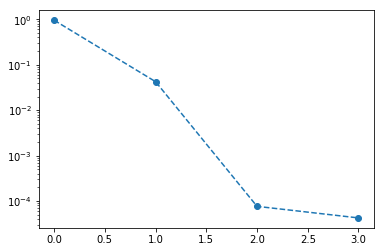

In [99]:
plt.semilogy(svd.explained_variance_ratio_, '--o')

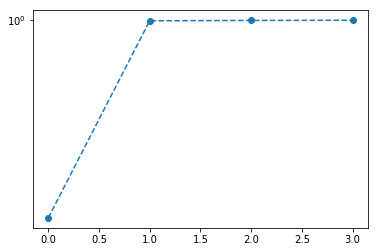

In [100]:
plt.semilogy(svd.explained_variance_ratio_.cumsum(), '--o')

# GradientBoostingClassifier

In [98]:
gradientboost = GradientBoostingClassifier(random_state=103040)
gradientboost.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 103040,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [99]:
param_grid= {'max_features': ["auto"], 'loss': ['deviance', 'exponential']}
grid_drop = GridSearchCV(gradientboost, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'loss': 'deviance', 'max_features': 'auto'} 0.717652444709


In [100]:
result2 = grid_drop.best_estimator_.predict(X_test)

In [101]:
roc_auc_score(y_test, result)

0.78668376558947539

# Predicción

In [81]:
to_predict = pd.read_csv('Predecir/test_final_100k.csv')

In [82]:
to_predict.shape

(100000, 3)

In [83]:
avisos = pd.read_csv('Predecir/avisos_detalles_predict.csv')
postulantes = pd.read_csv('Predecir/postulantes_datos_predict.csv')

In [84]:
to_predict_or = pd.merge(to_predict, avisos, on=['idaviso'], how='inner')

In [85]:
to_predict_or.shape

(100000, 43)

In [86]:
to_predict_or = pd.merge(to_predict_or, postulantes, on=['idpostulante'], how='inner')

In [87]:
to_predict_or.shape

(100000, 48)

In [88]:
postulaciones.columns

Index(['tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa', 'web', 'crecimiento', 'capacitacion',
       'clima laboral', 'multinacional', 'incorp_inmediata',
       'disponibilidad_horaria', 'disponibilidad_viajar', 'flexibilidad',
       'secundario', 'terciario', 'ingles', 'estudiantes', 'conoc_informatica',
       'experiencia', 'proactivo', 'relaciones_pers', 'desarrollador',
       'cajero', 'vendedor', 'ingeniero', 'analista', 'administrativo',
       'junior', 'jefe', 'marketing', 'supervisor', 'sexo'],
      dtype='object')

In [89]:
to_predict_or.columns

Index(['id', 'idaviso', 'idpostulante', 'Unnamed: 0_x', 'tipo_de_trabajo',
       'nivel_laboral', 'nombre_area', 'denominacion_empresa', 'web',
       'crecimiento', 'capacitacion', 'clima laboral', 'multinacional',
       'incorp_inmediata', 'disponibilidad_horaria', 'disponibilidad_viajar',
       'flexibilidad', 'secundario', 'terciario', 'ingles', 'estudiantes',
       'conoc_informatica', 'experiencia', 'proactivo', 'relaciones_pers',
       'desarrollador', 'cajero', 'vendedor', 'ingeniero', 'analista',
       'administrativo', 'junior', 'jefe', 'marketing', 'supervisor', 'online',
       'postu_total', 'total_vistas', 'vistas_median', 'cant_dias',
       'dia_inicio', 'dia_final', 'dia_inicio_semana', 'Unnamed: 0_y',
       'nombre', 'estado', 'sexo', 'edad'],
      dtype='object')

In [90]:
del to_predict_or['Unnamed: 0_x']
del to_predict_or['Unnamed: 0_y']
del to_predict_or['idaviso']
del to_predict_or['idpostulante']
del to_predict_or['postu_total']
del to_predict_or['online']
del to_predict_or['edad']
del to_predict_or['estado']
del to_predict_or['nombre']
del to_predict_or['dia_inicio_semana']
ids = to_predict_or['id']
del to_predict_or['id']
del to_predict_or['dia_final']
del to_predict_or['dia_inicio']
del to_predict_or['cant_dias']
del to_predict_or['total_vistas']
del to_predict_or['vistas_median']

In [91]:
to_predict_or.isnull().sum()

tipo_de_trabajo           0
nivel_laboral             0
nombre_area               0
denominacion_empresa      0
web                       0
crecimiento               0
capacitacion              0
clima laboral             0
multinacional             0
incorp_inmediata          0
disponibilidad_horaria    0
disponibilidad_viajar     0
flexibilidad              0
secundario                0
terciario                 0
ingles                    0
estudiantes               0
conoc_informatica         0
experiencia               0
proactivo                 0
relaciones_pers           0
desarrollador             0
cajero                    0
vendedor                  0
ingeniero                 0
analista                  0
administrativo            0
junior                    0
jefe                      0
marketing                 0
supervisor                0
sexo                      0
dtype: int64

In [66]:
pd.isnull(to_predict_or).sum() > 0

tipo_de_trabajo           False
nivel_laboral             False
nombre_area               False
denominacion_empresa      False
web                       False
crecimiento               False
capacitacion              False
clima laboral             False
multinacional             False
incorp_inmediata          False
disponibilidad_horaria    False
disponibilidad_viajar     False
flexibilidad              False
secundario                False
terciario                 False
ingles                    False
estudiantes               False
conoc_informatica         False
experiencia               False
proactivo                 False
relaciones_pers           False
desarrollador             False
cajero                    False
vendedor                  False
ingeniero                 False
analista                  False
administrativo            False
junior                    False
jefe                      False
marketing                 False
supervisor                False
sexo    

In [185]:
to_predict_or = to_predict_or.fillna({'total_vistas':avisos_train['total_vistas'].median(), 'vistas_median':avisos_train['vistas_median'].median()})

In [92]:
prediccion = grid_drop2.best_estimator_.predict(to_predict_or)

In [93]:
prediccion

array([ 0.08019845,  0.17222482,  0.08019845, ...,  0.08633916,
        0.08633916,  0.02926953])

In [94]:
predicciones = pd.DataFrame({'id':ids,'sepostulo':prediccion})

In [95]:
predicciones.to_csv('Predecir/final_trucho.csv', index=False)

In [96]:
predicciones.head()

,id,sepostulo
0,0,0.080198
1,1,0.172225
2,2,0.080198
3,3,0.000000
4,4,0.000000


In [90]:
predicciones['sepostulo'].value_counts()

0.000000    19222
0.500000      757
0.333333      691
0.250000      613
0.956981      549
0.969060      517
0.964351      447
0.428571      416
0.200000      384
0.909091      359
0.981645      355
0.666667      348
0.654412      346
0.400000      337
0.555556      293
0.890000      293
0.946537      293
0.166667      272
0.890918      270
0.142857      269
0.285714      257
0.939891      252
0.674837      244
0.792793      230
0.600000      228
0.564815      222
0.815534      221
0.743363      217
0.900935      215
0.969925      213
            ...  
0.912037        1
0.173184        1
0.864407        1
0.879310        1
0.069231        1
0.597701        1
0.744444        1
0.850340        1
0.534653        1
0.030769        1
0.309859        1
0.957647        1
0.786260        1
0.148936        1
0.383721        1
0.838384        1
0.898990        1
0.557143        1
0.842697        1
0.756522        1
0.922794        1
0.635659        1
0.894366        1
0.389381        1
0.283784  

In [35]:
def asd(row):
    if (row['sepostulo']<=0.33):
        return 0.0
    elif (row['sepostulo']>=0.66):
        return 1.0
    return row['sepostulo']

predicciones['sepostulo'] = predicciones.apply(asd, axis=1)

In [36]:
predicciones.to_csv('Predecir/final_rounded.csv', index=False)